In [2]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/Users/dostow/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Finding Data

In [7]:
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter

df = pd.read_excel("/Users/dostow/documents/Python/EmployeeAttritionData.xlsx")
print df.head()
print df.size

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0      

## Cleaning Data

In [109]:
travel_key = {"Travel_Rarely" : .5, "Travel_Frequently": 1, "Non-Travel": 0}
df = df.applymap(lambda s: travel_key.get(s) if s in travel_key else s)


In [11]:
dept_key = {"Sales": 1, "Research & Development": 2, "Human Resources": 3}

df = df.applymap(lambda s: dept_key.get(s) if s in dept_key else s)

In [13]:
education_key = {"Life Sciences": 1, "Medical": 2, "Marketing": 3, "Technical Degree": 4, "Other": 5}
df = df.applymap(lambda s: education_key.get(s) if s in education_key else s)

In [110]:
gender_marriage_Yes_key = {"Male": 0, "Female": 1, "Single": 1, "Married": 2, "Divorced": 3, "Yes": 1, "No": 0, "y": 1, "Y": 1}
df = df.applymap(lambda s: gender_marriage_Yes_key.get(s) if s in gender_marriage_Yes_key else s)


In [111]:
role_key = {'Sales Executive': 1, "Research Scientist" : 2, "Laboratory Technician": 3, 'Manufacturing Director': 4, 'Healthcare Representative':5, "Manager": 6, "Sales Representative": 7, "Research Director": 8, "sales executive": 1}
df = df.applymap(lambda s: role_key.get(s) if s in role_key else s)

In [112]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.543197,802.485714,1.739456,9.192517,2.912925,2.061224,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.266085,403.509100,0.527792,8.106864,1.024165,1.182033,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.500000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.500000,802.000000,2.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,0.500000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1.000000,1499.000000,3.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,0.031882,-0.001686,0.208034,-0.034303,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,-0.063991,0.077924,-0.031373,0.055560,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,0.002640,-0.009696,-0.008670,-0.017072,NaN,-0.018538,...,0.008926,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.007109,-0.004985,-0.016806,-0.010852,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,0.002640,-0.007109,1.000000,-0.017225,-0.007996,-0.076982,NaN,0.010895,...,0.022414,NaN,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,-0.017225,1.000000,0.021042,0.008430,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,-0.007996,0.021042,1.000000,0.025775,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.034303,0.055560,-0.017072,-0.010852,-0.076982,0.008430,0.025775,1.000000,NaN,0.009414,...,-0.005913,NaN,-0.020580,-0.028064,0.003601,0.050125,-0.019527,-0.009161,-0.021428,-0.003241
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.018538,-0.050990,0.010895,0.032916,0.042070,0.009414,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [20]:
%matplotlib inline

In [21]:
sns.heatmap?

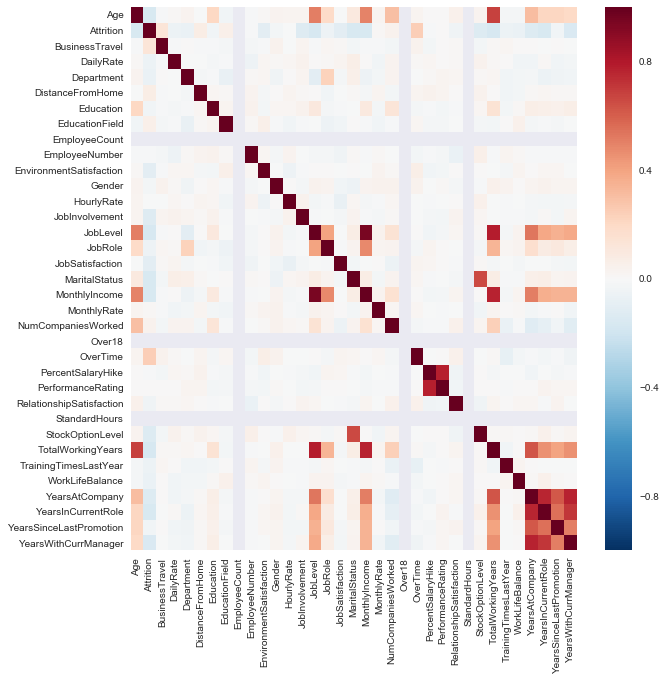

In [22]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), ax=ax)



In [23]:
df = df.drop(["StandardHours", "EmployeeCount", "Over18"], axis = 1)

In [24]:
df.Gender.sum()

588L

In [25]:
df["Gender"].count()

1470

In [26]:
df.Gender.value_counts()

0    882
1    588
Name: Gender, dtype: int64

<function matplotlib.pyplot.show>

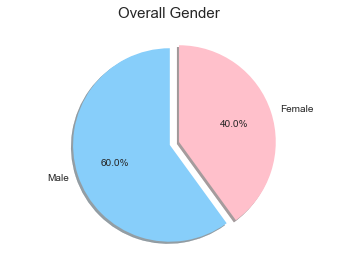

In [27]:

Labels = "Male", "Female"
Colors = ["lightskyblue", "pink"]
explode = [0,.1]
fig = plt.figure()
plt.pie(df.Gender.value_counts(),explode = explode, labels = Labels, colors = Colors, autopct='%1.1f%%', shadow = True, startangle = 90)
fig.suptitle("Overall Gender", fontsize =15)
plt.axis('equal')
plt.show

In [28]:
df.groupby("JobLevel").Gender.mean()

JobLevel
1    0.366483
2    0.411985
3    0.431193
4    0.481132
5    0.347826
Name: Gender, dtype: float64

In [29]:
seniority_groups = df.groupby("JobLevel")
seniority_groups.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.5,1102,1,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,2,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0.5,1373,2,2,2,5,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,2,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0.5,591,2,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,1.0,1005,2,2,2,1,8,4,...,3,3,0,8,2,2,7,7,3,6
6,59,0,0.5,1324,2,3,3,2,10,3,...,4,1,3,12,3,2,1,0,0,0
8,38,0,1.0,216,2,23,3,1,12,4,...,4,2,0,10,2,3,9,7,1,8
9,36,0,0.5,1299,2,27,3,2,13,3,...,3,2,2,17,3,2,7,7,7,7
11,29,0,0.5,153,2,15,2,1,15,4,...,3,4,0,10,3,3,9,5,0,8


In [30]:
seniority_groups.JobLevel.size()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [31]:
Manager = df[df["JobLevel"] == 5]
Seniority_lower = df[df["JobLevel"] <= 3]
Seniority_upper = df[df["JobLevel"] >= 4]
mid_manager = df[df["JobLevel"] == 4]
mid_manager_female = mid_manager[mid_manager["Gender"] == 1]

In [32]:
Manager.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,0,0.5,1282,2,5,3,5,32,3,...,3,4,1,26,3,2,14,13,4,8
29,46,0,0.5,705,1,2,4,3,38,2,...,3,4,0,22,2,2,2,2,2,1
45,41,1,0.5,1360,2,12,3,4,58,2,...,3,4,0,23,0,3,22,15,15,8
62,50,0,0.5,989,2,7,2,2,80,2,...,3,4,1,29,2,2,27,3,13,8
105,59,0,0.0,1420,3,2,4,3,140,3,...,4,4,1,30,3,3,3,2,2,2


In [33]:
Manager.Gender.value_counts()

0    45
1    24
Name: Gender, dtype: int64

<function matplotlib.pyplot.show>

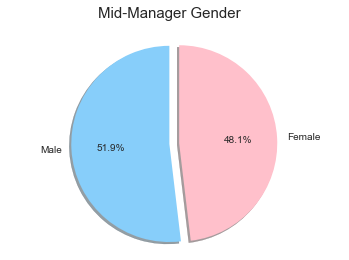

In [34]:
Labels = "Male", "Female"
Colors = ["lightskyblue", "pink"]
explode = [0, .1]

fig = plt.figure()
plt.pie(mid_manager.Gender.value_counts(), explode = explode, labels = Labels, colors = Colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
fig.suptitle("Mid-Manager Gender", fontsize = 15)
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show>

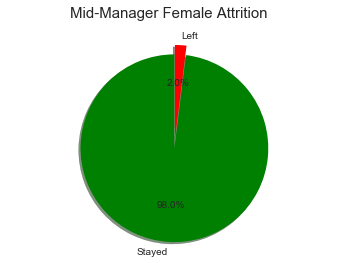

In [35]:
Labels = "Stayed", "Left"
Colors = ["green", "red"]
explode = [0, .1]

fig = plt.figure()
plt.pie(mid_manager_female.Attrition.value_counts(), explode = explode, labels = Labels, colors = Colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
fig.suptitle("Mid-Manager Female Attrition", fontsize = 15)
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show>

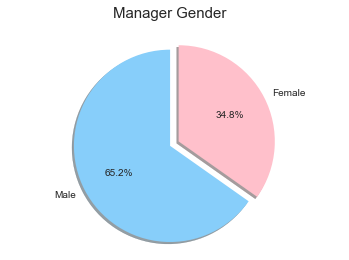

In [36]:
Labels = "Male", "Female"
Colors = ["lightskyblue", "pink"]
explode = [0,.1]

fig = plt.figure()
plt.pie(Manager.Gender.value_counts(),explode = explode, labels = Labels, colors = Colors, autopct='%1.1f%%', shadow = True, startangle = 90)
fig.suptitle("Manager Gender", fontsize =15)
plt.axis('equal')
plt.show

In [37]:
female_attrition = df[df["Gender"] == 1]["Attrition"]
male_attrition = df[df["Gender"] == 0]["Attrition"]
stats.ttest_ind(female_attrition, male_attrition)

Ttest_indResult(statistic=-1.1289761152328313, pvalue=0.25909236414147996)

In [38]:
female_pay = df[df["Gender"] == 1]["MonthlyIncome"]
male_pay = df[df["Gender"] == 0]["MonthlyIncome"]
ptest = stats.ttest_ind(female_pay, male_pay)
anova = stats.f_oneway(female_pay, male_pay)
print "ptest:", ptest
print "anova:", anova

ptest: Ttest_indResult(statistic=1.2212617308870655, pvalue=0.22218303455087898)
anova: F_onewayResult(statistic=1.4914802153292723, pvalue=0.22218303455087515)


In [39]:
df.groupby(["JobLevel", "Gender"]).Attrition.value_counts()
#significance testing
#proportions test
#t test
#anova-- look at trials to prove discrimination



JobLevel  Gender  Attrition
1         0       0            254
                  1             90
          1       0            146
                  1             53
2         0       0            280
                  1             34
          1       0            202
                  1             18
3         0       0            104
                  1             20
          1       0             82
                  1             12
4         0       0             51
                  1              4
          1       0             50
                  1              1
5         0       0             43
                  1              2
          1       0             21
                  1              3
Name: Attrition, dtype: int64

In [40]:
df.groupby(["JobLevel", "Gender"]).MonthlyIncome.mean()

JobLevel  Gender
1         0          2790.633721
          1          2780.487437
2         0          5549.184713
          1          5435.327273
3         0          9706.991935
          1          9962.702128
4         0         15570.927273
          1         15431.372549
5         0         19224.844444
          1         19129.916667
Name: MonthlyIncome, dtype: float64

In [41]:
df.groupby("JobLevel").Attrition.value_counts()

JobLevel  Attrition
1         0            400
          1            143
2         0            482
          1             52
3         0            186
          1             32
4         0            101
          1              5
5         0             64
          1              5
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x11f512b90>,
  <matplotlib.text.Text at 0x11f52ddd0>])

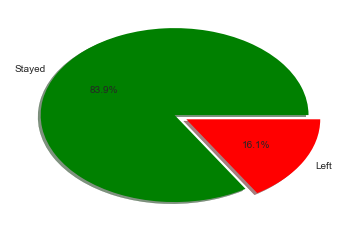

In [42]:
plt.pie(df.Attrition.value_counts(), autopct='%1.1f%%', explode = [0, .1], labels = ["Stayed", "Left"], colors = ["green", "red"], shadow = True)

([<matplotlib.patches.Wedge at 0x11f644850>,
  <matplotlib.text.Text at 0x11f65e090>])

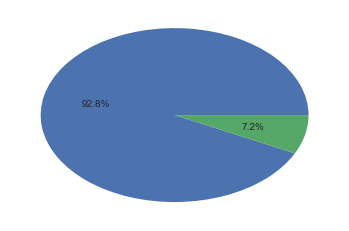

In [43]:
plt.pie(Manager.Attrition.value_counts(), autopct= "%1.1f%%")

([<matplotlib.patches.Wedge at 0x11f6a4290>,
  <matplotlib.text.Text at 0x11f77da90>])

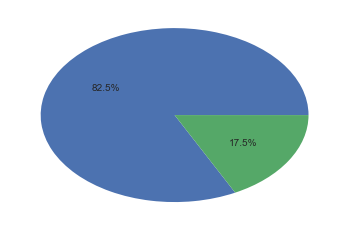

In [44]:
plt.pie(Seniority_lower.Attrition.value_counts(), autopct= "%1.1f%%")

([<matplotlib.patches.Wedge at 0x11efd7c90>,
  <matplotlib.text.Text at 0x11f134b50>])

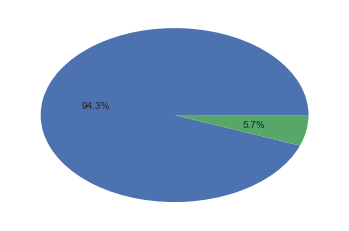

In [45]:
plt.pie(Seniority_upper.Attrition.value_counts(), autopct = "%1.1f%%")

## Decision Trees

In [46]:
NumCompaniesWorked

NameError: name 'NumCompaniesWorked' is not defined

In [48]:
df.columns.tolist()[-4]

u'YearsAtCompany'

In [121]:
X_rtn, y_rtn = df.drop("YearsAtCompany", axis = 1), df["YearsAtCompany"]
feature_names_rtn = X_rtn.columns.tolist()
target_name_rtn = df.columns.tolist()[-4]

In [122]:
X_rtn.columns.tolist()

[u'Age',
 u'Attrition',
 u'BusinessTravel',
 u'DailyRate',
 u'Department',
 u'DistanceFromHome',
 u'Education',
 u'EducationField',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobRole',
 u'JobSatisfaction',
 u'MaritalStatus',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager']

In [51]:
#Attrition
X, y = df.drop("Attrition", axis = 1), df["Attrition"]
feature_names = X.columns.tolist()
target_name = df.columns.tolist()[1]


In [107]:
X.columns.tolist()

[u'Age',
 u'BusinessTravel',
 u'DailyRate',
 u'Department',
 u'DistanceFromHome',
 u'Education',
 u'EducationField',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobRole',
 u'JobSatisfaction',
 u'MaritalStatus',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsAtCompany',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager']

In [53]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.5,1102,1,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,2,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0.5,1373,2,2,2,5,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,2,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0.5,591,2,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2


In [54]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.5,1102,1,1,2,1,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,2,8,1,1,2,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,0.5,1373,2,2,2,5,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,2,3,4,1,5,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0.5,591,2,2,1,2,7,1,0,...,3,4,1,6,3,3,2,2,2,2


In [55]:
df.columns.tolist()

[u'Age',
 u'Attrition',
 u'BusinessTravel',
 u'DailyRate',
 u'Department',
 u'DistanceFromHome',
 u'Education',
 u'EducationField',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobRole',
 u'JobSatisfaction',
 u'MaritalStatus',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsAtCompany',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager']

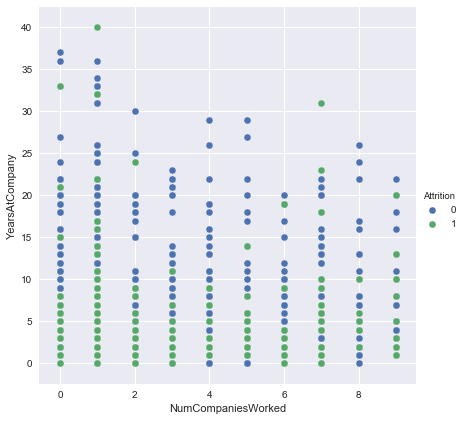

In [56]:
sns.pairplot(df, x_vars = ["NumCompaniesWorked"], y_vars=["YearsAtCompany"], hue = 'Attrition', size =6)

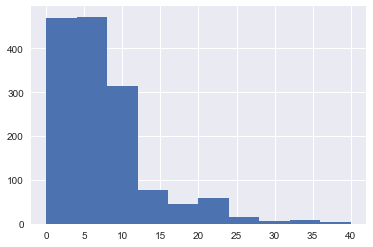

In [123]:
y_rtn.hist()

In [124]:
X_rtn_train, X_rtn_test, y_rtn_train, y_rtn_test = train_test_split(X_rtn, y_rtn, test_size = .4, random_state = 20)

In [125]:
#attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.4, random_state =20)

In [126]:
X_rtn.columns.tolist()

[u'Age',
 u'Attrition',
 u'BusinessTravel',
 u'DailyRate',
 u'Department',
 u'DistanceFromHome',
 u'Education',
 u'EducationField',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobRole',
 u'JobSatisfaction',
 u'MaritalStatus',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager']

In [127]:
X_rtn_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
910,23,0,0.5,373,2,1,2,1,1270,4,...,22,4,4,1,1,2,3,0,0,1
728,54,0,0.5,1441,2,17,3,4,1013,3,...,11,3,3,1,22,2,3,7,0,8
292,31,0,1.0,444,1,5,3,3,399,4,...,11,3,3,1,2,5,2,2,2,2
1338,30,1,0.5,945,1,9,3,2,1876,2,...,13,3,3,0,1,3,2,0,0,0
560,34,0,0.5,167,2,8,5,1,775,2,...,14,3,3,1,7,3,3,0,0,0


In [128]:
#Retention
decision_tree = DecisionTreeRegressor(max_depth = 2)
decision_tree.fit(X_rtn_train, y_rtn_train)

print "Decision Tree RSME:", np.sqrt(mean_squared_error(y_rtn_test, decision_tree.predict(X_rtn_test)))

Decision Tree RSME: 3.47916770572


In [117]:
#decision_tree = DecisionTreeRegressor(max_depth = 2)
#decision_tree.fit(X_train, y_train)

#print "Decision Tree RMSE", np.sqrt(mean_squared_error(y_test, decision_tree.predict(X_test)))

In [116]:
##clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, 
                                  #max_depth = 3, min_samples_leaf = 5)
#clf_entropy.fit(X_train_rtn, y_train_rtn)
#dot_data = tree.export_graphviz(clf_entropy, out_file = None)
#import pydotplus
#graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
#Image(graph.create_png())

In [115]:
##retention_importance =pd.DataFrame({'feature':feature_names_rtn, 'importance':clf_entropy.feature_importances_})
##retention_importance = retention_importance.sort_values(by="importance", ascending = False)
##print retention_importance

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_rtn, y_rtn = make_classification(n_samples=1000, n_features=50, n_informative=2, n_redundant=0, 
                          random_state=0, shuffle=False)
X_train_rtn, X_test_rtn, y_train_rtn, y_test_rtn = train_test_split(X, y, test_size=.4, random_state=42)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
clf_forest = RandomForestClassifier(max_depth=2, random_state=0)
clf_forest.fit(X_train_rtn,y_train_rtn)
important_features_forest = pd.DataFrame({'feature':feature_names_rtn, 'importance':clf_forest.feature_importances_})
important_features_forest = important_features_forest.sort_values(by="importance", ascending=False)

print "Important Features \n", important_features_forest


Important Features 
                     feature  importance
19        NumCompaniesWorked    0.327104
28        YearsInCurrentRole    0.112462
0                        Age    0.106313
16             MaritalStatus    0.086186
15           JobSatisfaction    0.080128
27           WorkLifeBalance    0.079839
1                  Attrition    0.078050
30      YearsWithCurrManager    0.058790
14                   JobRole    0.034172
17             MonthlyIncome    0.020968
24          StockOptionLevel    0.015987
20                  OverTime    0.000000
29   YearsSinceLastPromotion    0.000000
2             BusinessTravel    0.000000
26     TrainingTimesLastYear    0.000000
25         TotalWorkingYears    0.000000
23  RelationshipSatisfaction    0.000000
22         PerformanceRating    0.000000
21         PercentSalaryHike    0.000000
5           DistanceFromHome    0.000000
3                  DailyRate    0.000000
6                  Education    0.000000
4                 Department    0.000

In [114]:
#dot_data = StringIO()
#export_graphviz(decision_tree, out_file = dot_data, feature_names = X_train.columns.tolist(), 
                #filled = True, rounded = True, special_characters = True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

In [67]:
X_train.columns.tolist()

[u'Age',
 u'BusinessTravel',
 u'DailyRate',
 u'Department',
 u'DistanceFromHome',
 u'Education',
 u'EducationField',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobRole',
 u'JobSatisfaction',
 u'MaritalStatus',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsAtCompany',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager']

In [115]:
#dot_data = StringIO()  
#export_graphviz(decision_tree, out_file=dot_data,  
                   # feature_names=X_train.columns.tolist(),  
                   # filled=True, rounded=True,  
                   # special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())  

In [116]:
#dot_data = StringIO()  
#export_graphviz(decision_tree, out_file=dot_data,  
                   # feature_names=X_train.columns.tolist(),  
                  #  filled=True, rounded=True,  
                  #  special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())  

In [70]:
from sklearn.tree import DecisionTreeClassifier
attrition_tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
attrition_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [117]:
#dot_data_occ.getvalue()

In [72]:
ls

Applications/             Library/                  anaconda/
Desktop/                  Movies/                   lpthw/
Documents/                Music/                    temp/
Downloads/                Pictures/                 temp1/
Learnpythonthehardway.py  Public/                   untitled0.py


In [119]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt


#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

#This allows us to make a decision tree real fast directly in the notebook!
#from sklearn.tree import DecisionTreeClassifier
#A_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
#A_tree.fit(X_rtn_train, y_rtn_train)

#dot_data_occ = StringIO()  
#export_graphviz(A_tree, out_file=dot_data_occ,  
                    #feature_names=X_rtn_train.columns.tolist(),  
                    #filled=True, rounded=True,  
                   # special_characters=False)  
#graph = pydotplus.graph_from_dot_data(dot_data_occ.getvalue())  
#Image(graph.create_png())

In [120]:
#dot_data = export_graphviz(attrition_tree, out_file = dot_data, 
              #  feature_names = X_train.columns.tolist(), 
              #  filled = True, rounded = True, 
              #  special_characters = True)
#import graphvis
#graph = graphvis.Source(dot_data)
#graph

In [75]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [77]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.5,1102,1,1,2,1,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,2,8,1,1,2,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,0.5,1373,2,2,2,5,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,2,3,4,1,5,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0.5,591,2,2,1,2,7,1,0,...,3,4,1,6,3,3,2,2,2,2
5,32,1.0,1005,2,2,2,1,8,4,0,...,3,3,0,8,2,2,7,7,3,6
6,59,0.5,1324,2,3,3,2,10,3,1,...,4,1,3,12,3,2,1,0,0,0
7,30,0.5,1358,2,24,1,1,11,4,0,...,4,2,1,1,2,3,1,0,0,0
8,38,1.0,216,2,23,3,1,12,4,0,...,4,2,0,10,2,3,9,7,1,8
9,36,0.5,1299,2,27,3,2,13,3,0,...,3,2,2,17,3,2,7,7,7,7


In [78]:
#DecisionTreeClassifier??

In [121]:
#import graphviz
#from sklearn import tree

#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_rtn_test, y_rtn_test)
#dot_data = tree.export_graphviz(clf, out_file = None, 
                            #    feature_names = feature_names_rtn, filled = True,
                            #   rounded = True, special_characters = True)
#graph = graphviz.Source(dot_data)
#graph


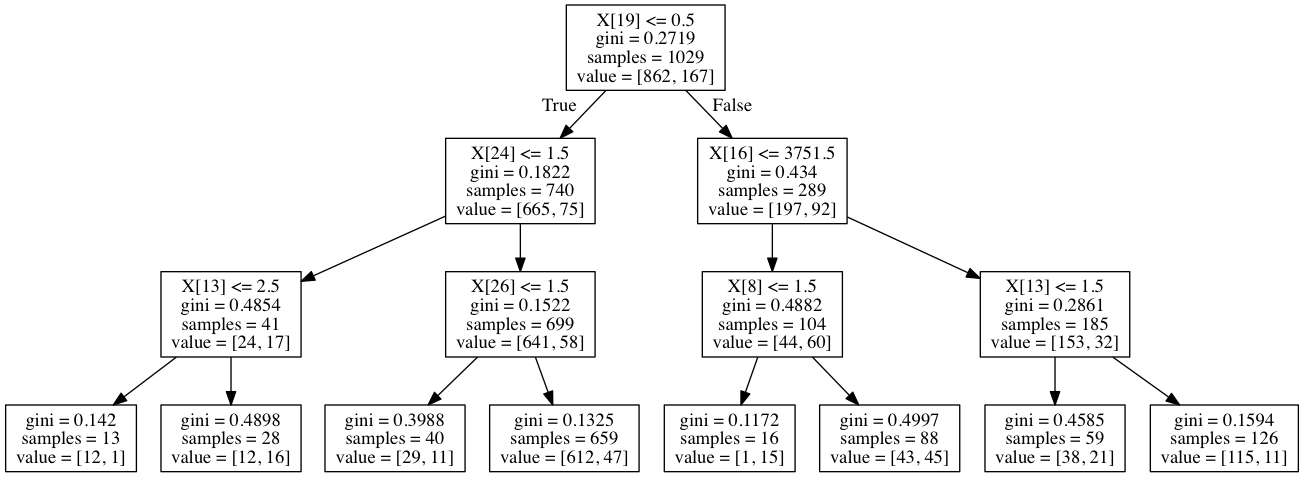

In [80]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, 
                                  max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_gini, out_file = None)
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())


## How to predict promotion, or cases of descrimination-- look into it

restrict trees in trying more features, then there will be more opporunities to try to learn what features are importance


try random forrest classification model 


In [81]:
from sklearn.metrics import accuracy_score

print metrics.accuracy_score(y_test, clf_gini.predict(X_test))

print metrics.classification_report(y_test, clf_gini.predict(X_test))

0.823129251701
             precision    recall  f1-score   support

          0       0.88      0.92      0.90       371
          1       0.43      0.33      0.37        70

avg / total       0.81      0.82      0.81       441



In [108]:
feature_importance_sorted =pd.DataFrame({'feature':feature_names, 'importance':clf_gini.feature_importances_})
feature_importance_sorted = feature_importance_sorted.sort_values(by="importance", ascending=False)
print feature_importance_sorted

                     feature  importance
16             MonthlyIncome    0.421083
19                  OverTime    0.282401
2                  DailyRate    0.105574
15             MaritalStatus    0.093537
8    EnvironmentSatisfaction    0.052894
7             EmployeeNumber    0.044510
28        YearsInCurrentRole    0.000000
27            YearsAtCompany    0.000000
26           WorkLifeBalance    0.000000
18        NumCompaniesWorked    0.000000
25     TrainingTimesLastYear    0.000000
24         TotalWorkingYears    0.000000
23          StockOptionLevel    0.000000
22  RelationshipSatisfaction    0.000000
21         PerformanceRating    0.000000
20         PercentSalaryHike    0.000000
29   YearsSinceLastPromotion    0.000000
0                        Age    0.000000
17               MonthlyRate    0.000000
1             BusinessTravel    0.000000
14           JobSatisfaction    0.000000
13                   JobRole    0.000000
12                  JobLevel    0.000000
11            Jo

In [83]:
y_test.mean()

0.15873015873015872

In [92]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

lr = LogisticRegression(C=1e9)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print("Test set accuracy of LR model: ",metrics.accuracy_score(y_test, y_test_pred))

('Test set accuracy of LR model: ', 0.83900226757369611)


In [90]:
from sklearn.dummy import DummyClassifier
dumb_model = DummyClassifier(strategy='stratified')
dumb_model.fit(X_train, y_train)
y_dumb_class = dumb_model.predict(X_test)
print "Most frequent class dummy classifier test accuracy:", metrics.accuracy_score(y_test, y_dumb_class)

Most frequent class dummy classifier test accuracy: 0.714285714286


In [91]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[355,   9],
       [ 62,  15]])

In [93]:
# calculate each metric by hand
print("Sensitivity/Recall (TPR): ",cm[1,1] / float(cm[1,1] + cm[1,0]))
print("Specificity (TNR): ", cm[0,0] / float(cm[0,0] + cm[0,1]))
print("Precision (PPV): ", cm[1,1] / float(cm[1,1]+cm[0,1]))
print("NPV: ", cm[0,0] / float(cm[0,0]+cm[1,0]))
print("Accuracy: ", (cm[1,1]+cm[0,0]) / float(cm.sum()))
print("F1:", metrics.f1_score(y_test,y_test_pred))

('Sensitivity/Recall (TPR): ', 0.19480519480519481)
('Specificity (TNR): ', 0.97527472527472525)
('Precision (PPV): ', 0.625)
('NPV: ', 0.85131894484412474)
('Accuracy: ', 0.83900226757369611)
('F1:', 0.29702970297029707)


In [94]:
# calculate some of these metrics using sklearn and the test set samples
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred))
print("Accuracy: ", metrics.accuracy_score(y_test,y_test_pred))
print("F1:", metrics.f1_score(y_test,y_test_pred))

('Sensitivity/Recall (TPR): ', 0.19480519480519481)
('Precision (PPV): ', 0.625)
('Accuracy: ', 0.83900226757369611)
('F1:', 0.29702970297029707)


In [95]:
print "Classification Report:\n", metrics.classification_report(y_test,y_test_pred)

Classification Report:
             precision    recall  f1-score   support

          0       0.85      0.98      0.91       364
          1       0.62      0.19      0.30        77

avg / total       0.81      0.84      0.80       441



In [96]:
#lr probabilities per category for first five samples
predicted_probs_lr = lr.predict_proba(X_test).round(3)
predictions_lr = lr.predict(X_test)

print "Logistic Regression predicted probabilities for first five samples in test set:\n", predicted_probs_lr[:5]
print "Logistic Regression predictions for first five samples in test set:\n", predictions_lr[:5]
y_test_lr_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_lr,predictions_lr.reshape((predictions_lr.shape[0],-1)),
        y_test.reshape((y_test.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_lr_df.head()

Logistic Regression predicted probabilities for first five samples in test set:
[[ 0.881  0.119]
 [ 0.362  0.638]
 [ 0.328  0.672]
 [ 0.609  0.391]
 [ 0.911  0.089]]
Logistic Regression predictions for first five samples in test set:
[0 1 1 0 0]


/Users/dostow/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


,class_0,class_1,predicted,actual
0,0.881,0.119,0.0,1.0
1,0.362,0.638,1.0,1.0
2,0.328,0.672,1.0,1.0
3,0.609,0.391,0.0,0.0
4,0.911,0.089,0.0,0.0


In [97]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

predicted_probs_rf = rf.predict_proba(X_test)
predictions_rf = rf.predict(X_test)

y_test_rf_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_rf,predictions_rf.reshape((predictions_rf.shape[0],-1)),
        y_test.reshape((y_test.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_rf_df.head()

/Users/dostow/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


,class_0,class_1,predicted,actual
0,0.93,0.07,0.0,1.0
1,0.38,0.62,1.0,1.0
2,0.38,0.62,1.0,1.0
3,0.53,0.47,0.0,0.0
4,0.85,0.15,0.0,0.0


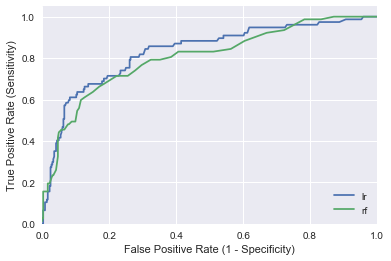

In [98]:
#generate lr model false positive and true positive rates
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, predicted_probs_lr[:,1])

#generate same for random forest model
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, predicted_probs_rf[:,1])

# plot LR and RF model ROC curves

plt.plot(fpr_lr, tpr_lr,label="lr")
plt.plot(fpr_rf, tpr_rf,label="rf")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)');

In [99]:
# calculate AUC for lr and rf
print "LR model AUC:", metrics.roc_auc_score(y_test, predicted_probs_lr[:,1])
print "RF model AUC:", metrics.roc_auc_score(y_test, predicted_probs_rf[:,1])

LR model AUC: 0.831811046097
RF model AUC: 0.803143285286


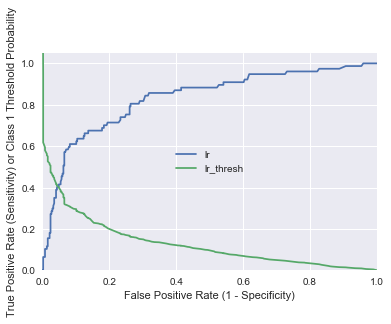

In [100]:
# plot LR and RF model ROC curves
plt.plot(fpr_lr, tpr_lr,label="lr")
plt.plot(fpr_lr,thresholds_lr, label="lr_thresh")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="center")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity) or Class 1 Threshold Probability')

In [101]:
y_test_lr_df["predicted_07"] = (y_test_lr_df.class_1 > 0.7).astype(float)
print y_test_lr_df.head()
print "Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted),"\n"
print "Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                          y_test_lr_df.predicted),"\n"
print "Confusion matrix at 0.7 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted_07),"\n"
print "Classification Report at 0.7 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                 y_test_lr_df.predicted_07)

   class_0  class_1  predicted  actual  predicted_07
0    0.881    0.119        0.0     1.0           0.0
1    0.362    0.638        1.0     1.0           0.0
2    0.328    0.672        1.0     1.0           0.0
3    0.609    0.391        0.0     0.0           0.0
4    0.911    0.089        0.0     0.0           0.0
Confusion matrix at original 0.5 threshold:
[[355   9]
 [ 62  15]] 

Classification Report at original 0.5 threshold:
             precision    recall  f1-score   support

        0.0       0.85      0.98      0.91       364
        1.0       0.62      0.19      0.30        77

avg / total       0.81      0.84      0.80       441


Confusion matrix at 0.7 threshold:
[[363   1]
 [ 77   0]] 

Classification Report at 0.7 threshold:
             precision    recall  f1-score   support

        0.0       0.82      1.00      0.90       364
        1.0       0.00      0.00      0.00        77

avg / total       0.68      0.82      0.75       441



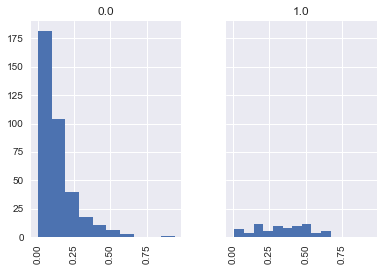

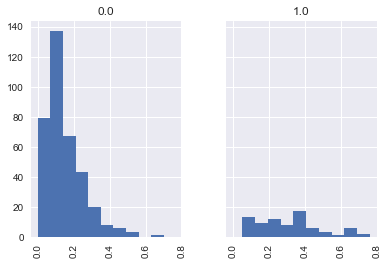

In [102]:
# histogram of predicted probabilities grouped by actual response value for LR
y_test_lr_df.class_1.hist(by= y_test_lr_df.actual, sharex=True, sharey=True);
#same for RF
y_test_rf_df.class_1.hist(by= y_test_rf_df.actual, sharex=True, sharey=True);